# Eat Safe, Love

## Notebook Set Up

In [1]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the uk_food database to a variable name
db = mongo.uk_food

In [4]:
# review the collections in our database
db.list_collection_names()

['establishments']

In [5]:
# assign the collection to a variable
establishments = db.establishments

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [6]:
# Find the establishments with a hygiene score of 20
query = {"scores.Hygiene": 20}

# Use count_documents to display the number of documents in the result
print(establishments.count_documents(query))
# Display the first document in the results using pprint
pprint(establishments.find_one(query))

41
{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': 0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('668f273f0ec8270db856465e'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self'}],
 'meta': {'dataSource': None,
          'extractD

In [7]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(establishments.find(query))
# Display the number of rows in the DataFrame
print(df.shape[0])
# Display the first 10 rows of the DataFrame
df.head(10)

41


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,668f273f0ec8270db856465e,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,668f273f0ec8270db85649df,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,668f273f0ec8270db8564ce9,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,668f273f0ec8270db8564ed7,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,668f273f0ec8270db8564ee6,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,668f273f0ec8270db8565885,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,668f273f0ec8270db8565aa6,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,668f27400ec8270db8566fd1,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,668f27400ec8270db8567415,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [8]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query = {"LocalAuthorityName": {"$regex": "London"}, "RatingValue": {"$gte": 4}}

# Use count_documents to display the number of documents in the result
print(establishments.count_documents(query))

# Display the first document in the results using pprint
pprint(establishments.find_one(query))

33
{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': 4,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('668f27400ec8270db8566079'),
 'geocode': {'latitude': 51.369321, 'longitude': 0.508551},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/621707',
            'rel': 'self

In [9]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(establishments.find(query))
# Display the number of rows in the DataFrame
print(df.shape[0])
# Display the first 10 rows of the DataFrame
df.head(10)

33


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,668f27400ec8270db8566079,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,668f27400ec8270db856639f,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,668f27400ec8270db8566eec,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,668f27410ec8270db8567cec,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,668f27410ec8270db8567ced,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,668f27410ec8270db85683f5,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,668f27420ec8270db856a503,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,668f27420ec8270db856a8ca,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.048006, 'latitude': 51.503733}",,4649.173485,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,668f2742

### 3. What are the top 5 establishments with a `RatingValue` of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [10]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.083812
longitude = 1.195625

query = {
    "geocode.latitude": {"$gte": latitude - degree_search, "$lte": latitude + degree_search},
    "geocode.longitude": {"$gte": longitude - degree_search, "$lte": longitude + degree_search},
    "RatingValue": 5,
    "scores.Hygiene": {"$gte": 0}
}
sort = [("scores.Hygiene", 1)]
limit = 5

result = establishments.find(query).sort(sort).limit(limit)

# Print the results
pprint(list(result))

[{'AddressLine1': '1 The Stade',
  'AddressLine2': 'Folkestone',
  'AddressLine3': 'Kent',
  'AddressLine4': '',
  'BusinessName': 'Folkestone Trawlers Shop',
  'BusinessType': 'Retailers - other',
  'BusinessTypeID': 4613,
  'ChangesByServerID': 0,
  'Distance': 4591.912144538092,
  'FHRSID': 344689,
  'LocalAuthorityBusinessID': 'PI/000002095',
  'LocalAuthorityCode': '188',
  'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
  'LocalAuthorityName': 'Folkestone and Hythe',
  'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'CT19 6AB',
  'RatingDate': '2020-02-14T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': 5,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('668f273e0ec8270db8562b34'),
  'geocode': {'latitude': 51.08084, 'longitude': 1.188537},
  'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/344689',
             'rel': 'self'}],
  'meta': {'dataSo

In [11]:
# Convert result to Pandas DataFrame
result = establishments.find(query).sort(sort).limit(limit)
    # for some reason, the result from the last cell cannot be converted to a DataFrame

df = pd.DataFrame(result)
df

,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,668f273e0ec8270db8562b34,344689,0,PI/000002095,Folkestone Trawlers Shop,Retailers - other,4613,1 The Stade,Folkestone,Kent,...,http://www.folkestone-hythe.gov.uk,foodteam@folkestone-hythe.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 1.188537, 'latitude': 51.08084}",,4591.912145,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,668f273e0ec8270db8562b39,1071930,0,PI/000076531,The Club Hut,Pub/bar/nightclub,7843,Folkestone Harbour,Harbour Approach Road,Folkestone,...,http://www.folkestone-hythe.gov.uk,foodteam@folkestone-hythe.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 1.18590330311705, 'latitude': 51...",,4591.914705,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,668f273e0ec8270db8562b35,894592,0,PI/000074396,Docker,Retailers - other,4613,Folkestone Harbour,Harbour Approach Road,Folkestone,...,http://www.folkestone-hythe.gov.uk,foodteam@folkestone-hythe.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 1.18590330311705, 'latitude': 51...",,4591.914705,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,668f273e0ec8270db8562b2e,289353,0,PI/000002468,St Marys COE (aided) Primary School,School/college/university,7845,St Marys Church Of England Primary School,Warren Road,Folkestone,...,http://www.folkestone-hythe.gov.uk,foodteam@folkestone-hythe.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 1.194762, 'latitude': 51.085797}",,4591.871474,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,668f273e0ec8270db8562b32,289560,0,PI/000039927,Mariner,Pub/bar/nightclub,7843,16 The Stade,Folkestone,Kent,...,http://www.folkestone-hythe.gov.uk,foodteam@folkestone-hythe.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 1.188537, 'latitude': 51.08084}",,4591.912145,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [12]:
# Create a pipeline that:
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest
match_query = {"$match": {"scores.Hygiene": 0}}
group_query = {"$group": {"_id": "$LocalAuthorityName", "count": {"$sum": 1}}}
sort = {"$sort": {"count": -1}}

result = list(establishments.aggregate([match_query, group_query, sort]))
# Print the number of documents in the result
print(len(result))
# Print the first 10 results
pprint(result[0:10])

55
[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [13]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result)
# Display the number of rows in the DataFrame
print(df.shape[0])
# Display the first 10 rows of the DataFrame
df.head(10)

55


,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


<Axes: xlabel='_id'>

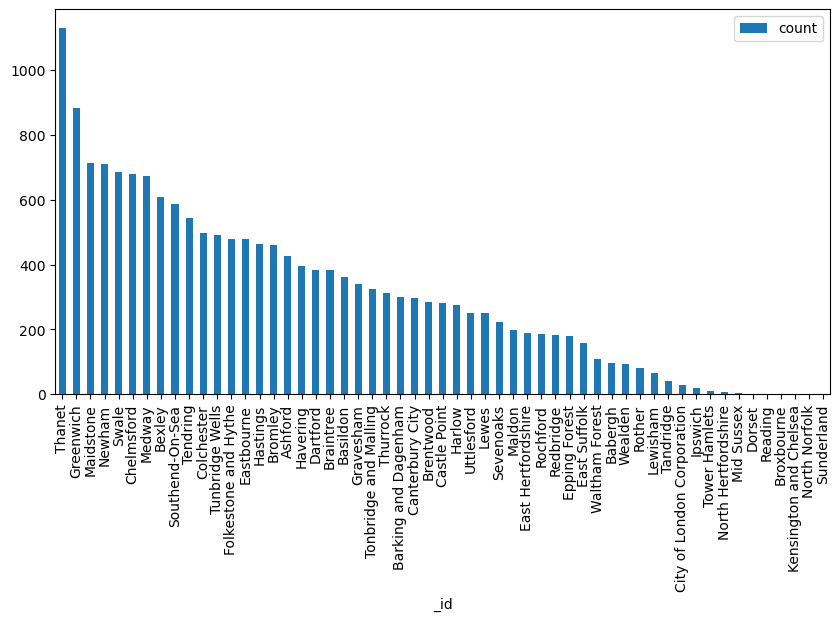

In [14]:
df.plot(x="_id", y="count", kind="bar", figsize=(10,5))